In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from pprint import pprint
from time import time

from IPython.display import Image

from math import *

# Toucan Records

![ToucanRecords](img/toucan_records.png)

source : https://www.alamy.com/toucan-bird-with-happy-face-illustration-image155731047.html

## Analye qualitative du sujet

Qu'est ce que gagner de l'argent dans la musique aujourd'hui ?

Apparition de napster en 2000 puis partage de musique en ligne -> changement de paradigme, nouveau "buisness model".   
Ecroulement des ventes CD entre 2000 et 2010. Les artistes qui sont restés rémunérateur sont ceux qui ont maximisé les concerts, les produits dérivés et ambassadeur de marques. En 2015 les choses ont changée, il faut être un artiste très présent sur les plateformes de musiques, en particulier Spotify. C'est ce qu'on a analysé spécifiquement au travers de leur API.

![](courbe_de_revenu.png)

source : https://www.theguardian.com/technology/2018/apr/24/music-streaming-revenues-overtake-cds-to-hit-66bn

### Référence 1 : Official chart UK

La popularité sur " Official UK Top 40 Charts ".

C'est un classement reconnu qui se distingue du classement Américain qui est une source complémentaire.

In [2]:
filename = 'followers_top_artist_billboard'
df_uk = pd.read_csv(filename + '.csv', sep=';', header=None)
df_uk.head()

X = df_uk[[0,2,3]]
Y = df_uk[[1]]
X = X.dropna()
Y = Y.dropna()

In [3]:
plt.figure()
plt.plot(X.loc[:,2].values, Y.values)

<IPython.core.display.Javascript object>

TypeError: unhashable type: 'numpy.ndarray'

### Analyse technique des musiques

In [5]:
filename = 'X_spotify'
df = pd.read_csv(filename + '.csv', sep=',')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0,0.1530,0.841,212500,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591,99
1,1,0.1280,0.745,136032,0.715,0.000000,1,0.1820,-3.368,0,0.2450,94.513,4,0.342,77
2,2,0.0893,0.761,192405,0.672,0.000010,1,0.1400,-5.887,1,0.2120,160.077,3,0.437,76
3,3,0.0141,0.817,210368,0.539,0.000496,6,0.0990,-6.349,0,0.0621,97.062,4,0.158,97
4,4,0.0115,0.820,135739,0.691,0.000000,6,0.3440,-6.646,0,0.0723,142.027,4,0.683,76


#### Prépaparation des données

In [6]:
X = df.iloc[:,1:-1]
Y = df.loc[:,'popularity']

X.loudness = X.loudness*(-1)


#### Recherche du meilleur modèle 

In [7]:
tree_pipe = Pipeline([
#    ('oneHotEncoder', OneHotEncoder() ),
    ('tree', ExtraTreeRegressor(criterion='mse', random_state=4, max_features=None) ),
    ])

parameters= {
     'tree__max_depth': (1050,1100,1150,1200,1300),
}

pipeline = tree_pipe

grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)

print("Performing grid search...")
print("pipeline :", [name for name, _ in pipeline.steps])
print("parameters :")
pprint(parameters)
t0 = time()
grid_search.fit(X, Y)

print("done in %0.3fs" % (time() - t0))
print()
print("Best score: %0.3f" % grid_search.best_score_)

print("Best parameters set :")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline : ['tree']
parameters :
{'tree__max_depth': (1050, 1100, 1150, 1200, 1300)}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


done in 11.235s

Best score: 0.763
Best parameters set :
	tree__max_depth: 1050


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.1s finished


#### Quelles sont les composantes de la chanson à imposer à l'artiste ?

<IPython.core.display.Javascript object>


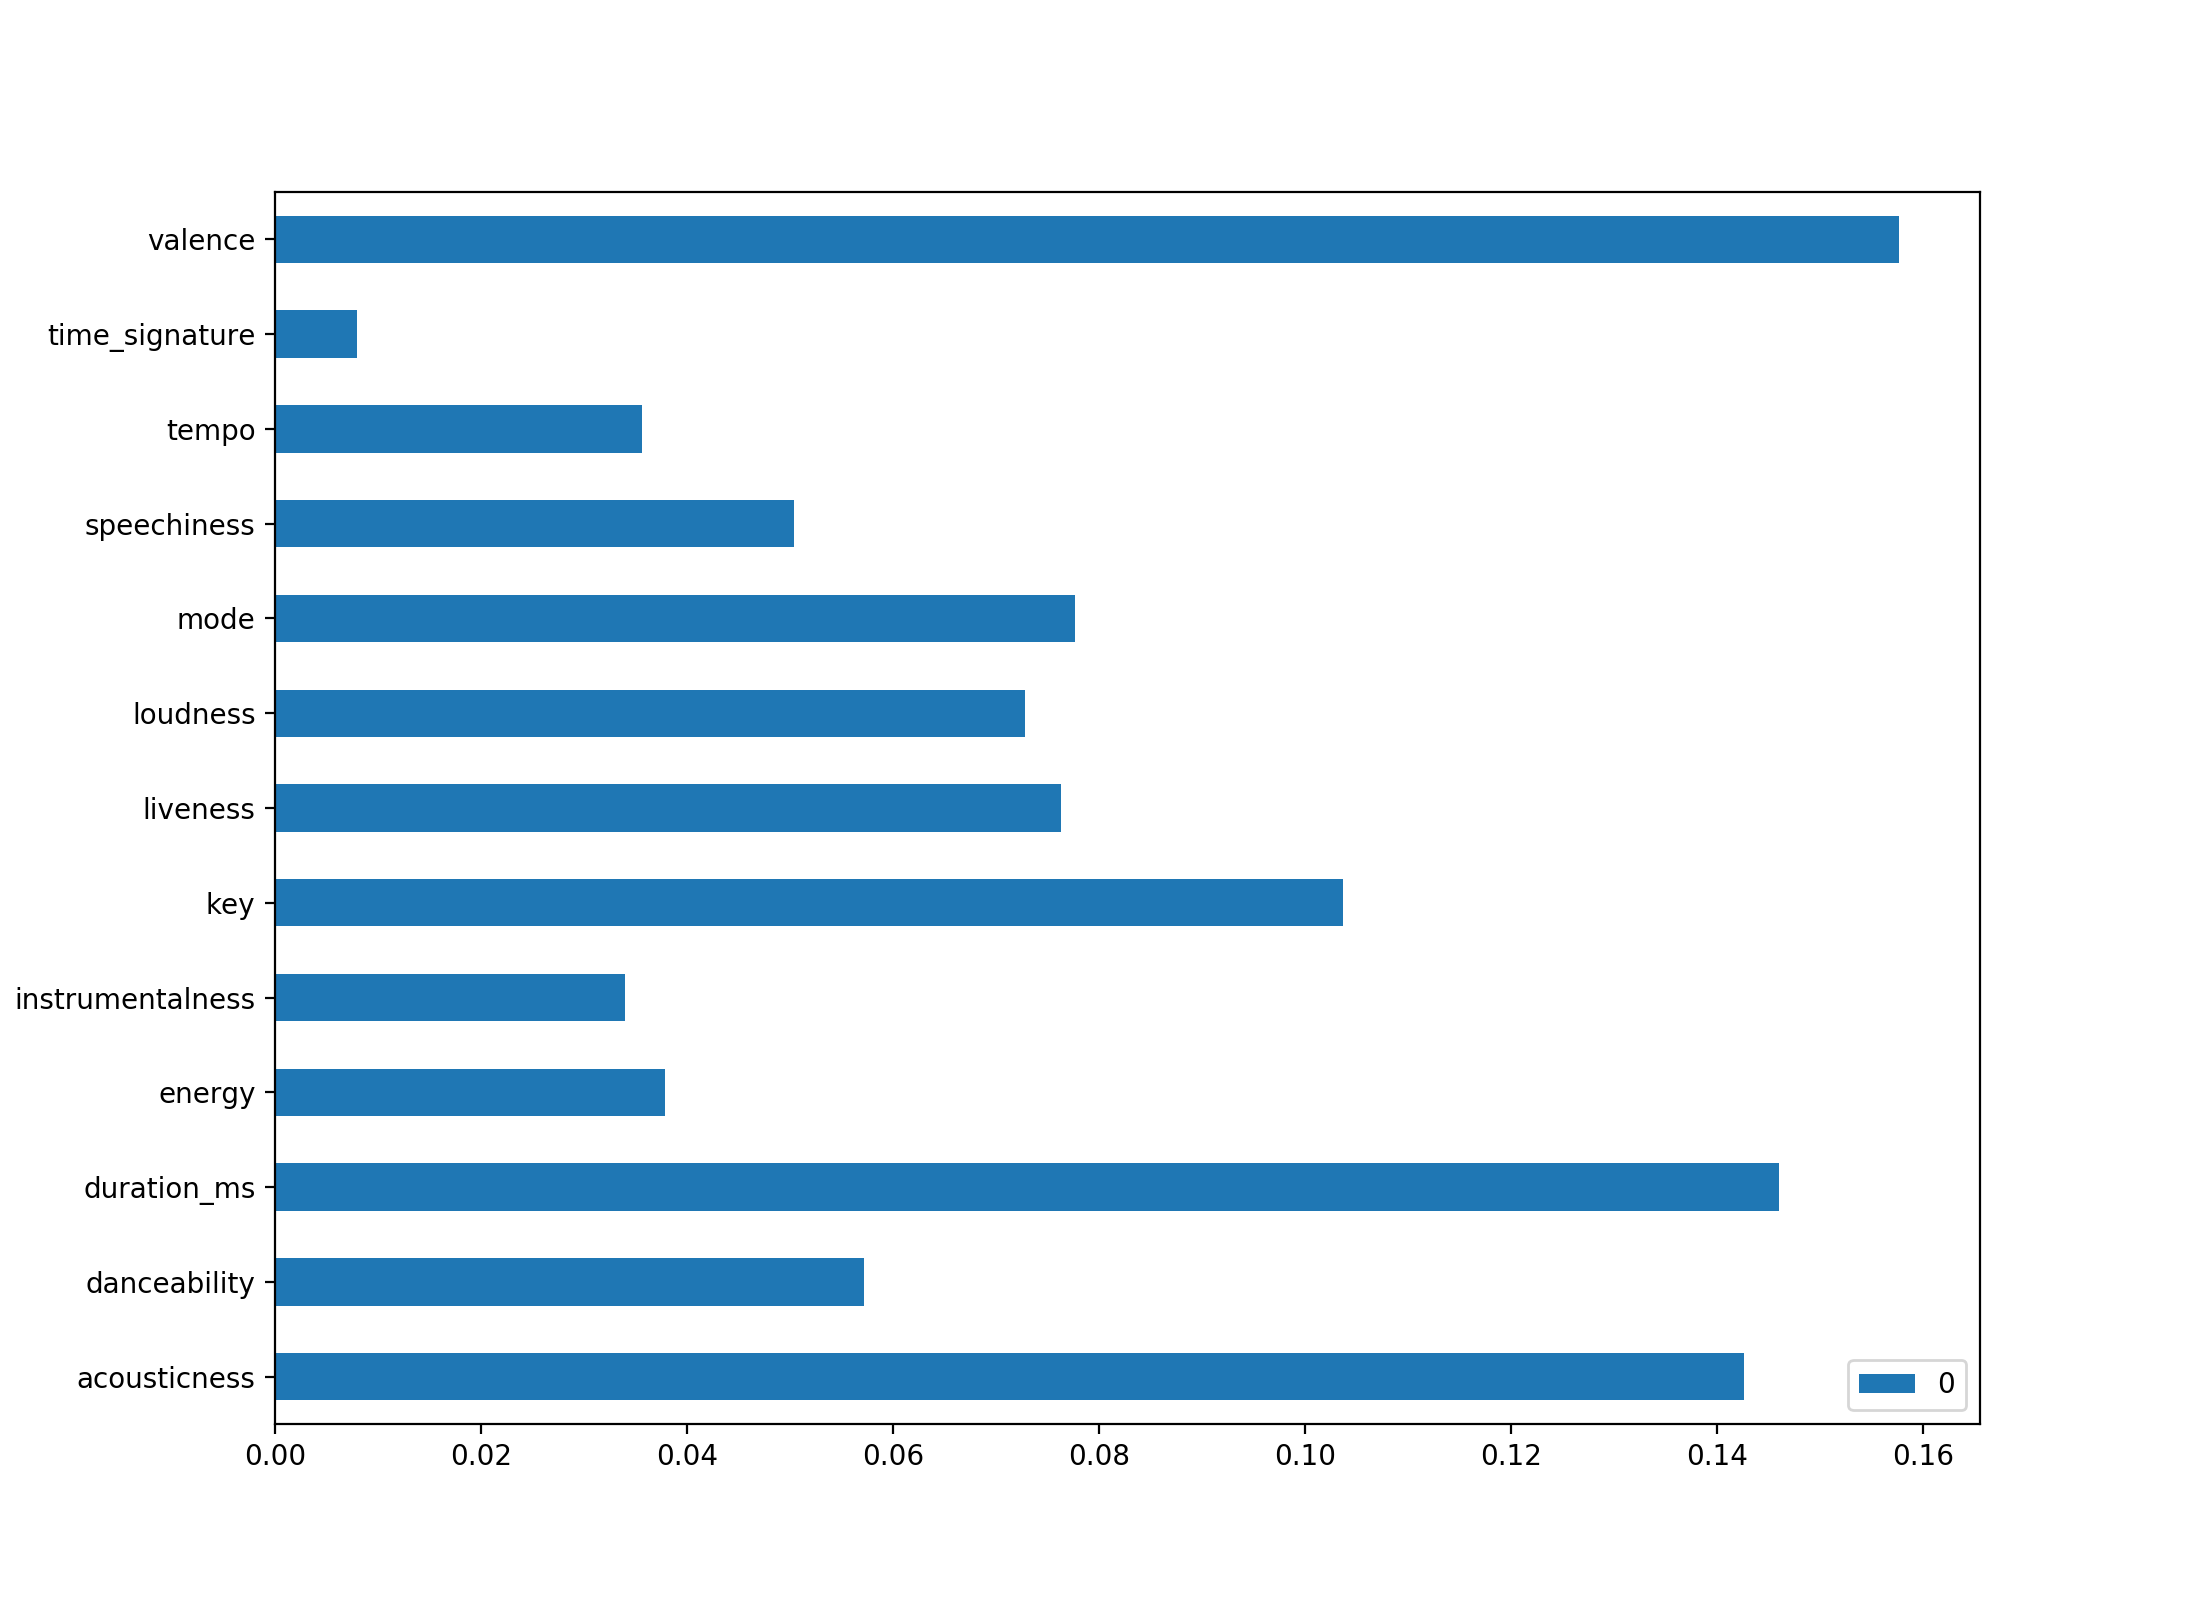

In [111]:
model = ExtraTreeRegressor(criterion='mse', random_state=4, max_features=None, max_depth=1050).fit(X,Y)
df_histo = pd.DataFrame(model.feature_importances_, index=['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
df_histo.plot(kind='barh', figsize=(11,8))

<IPython.core.display.Javascript object>


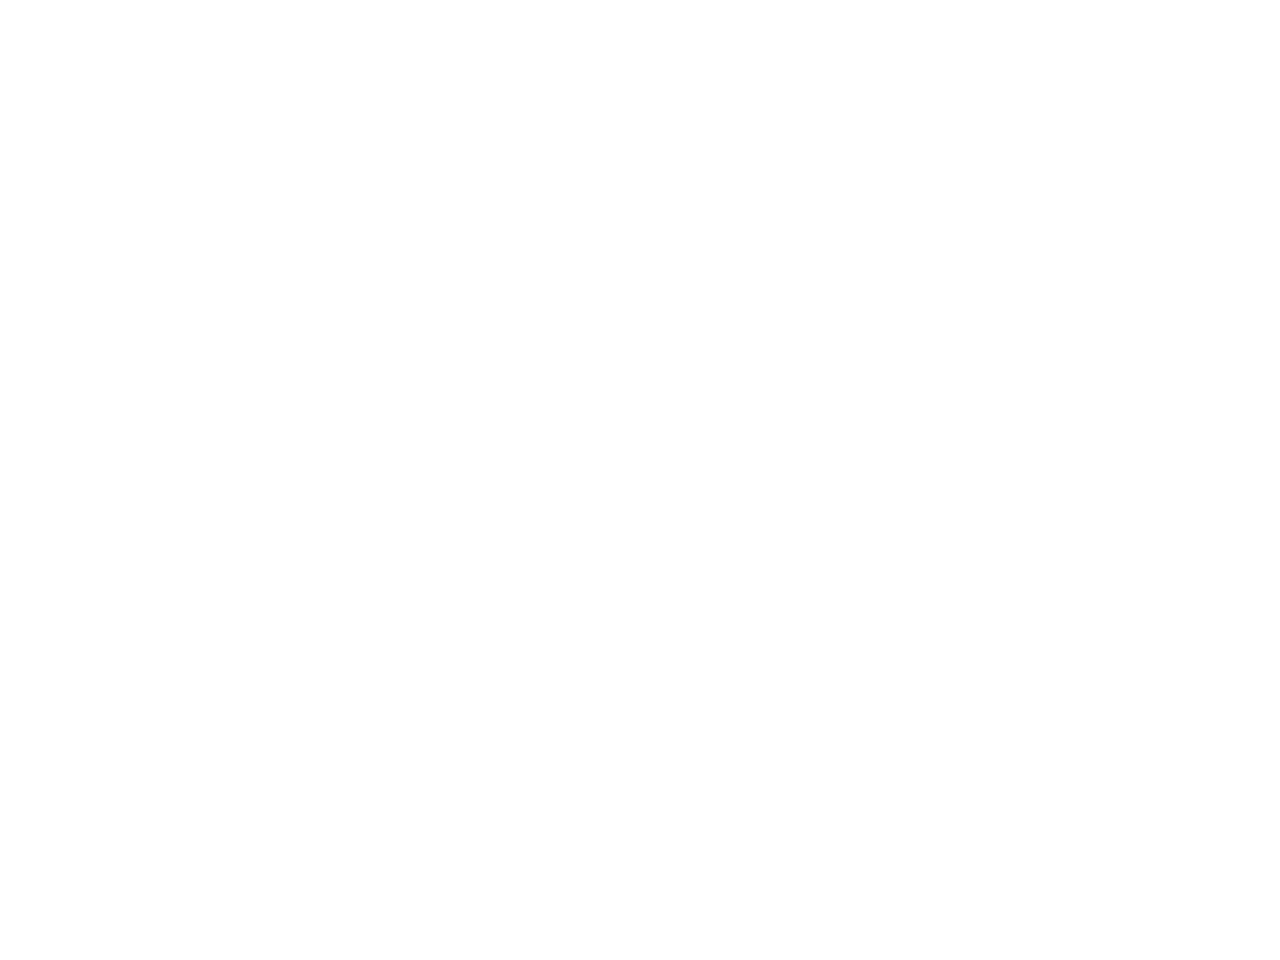

<IPython.core.display.Javascript object>


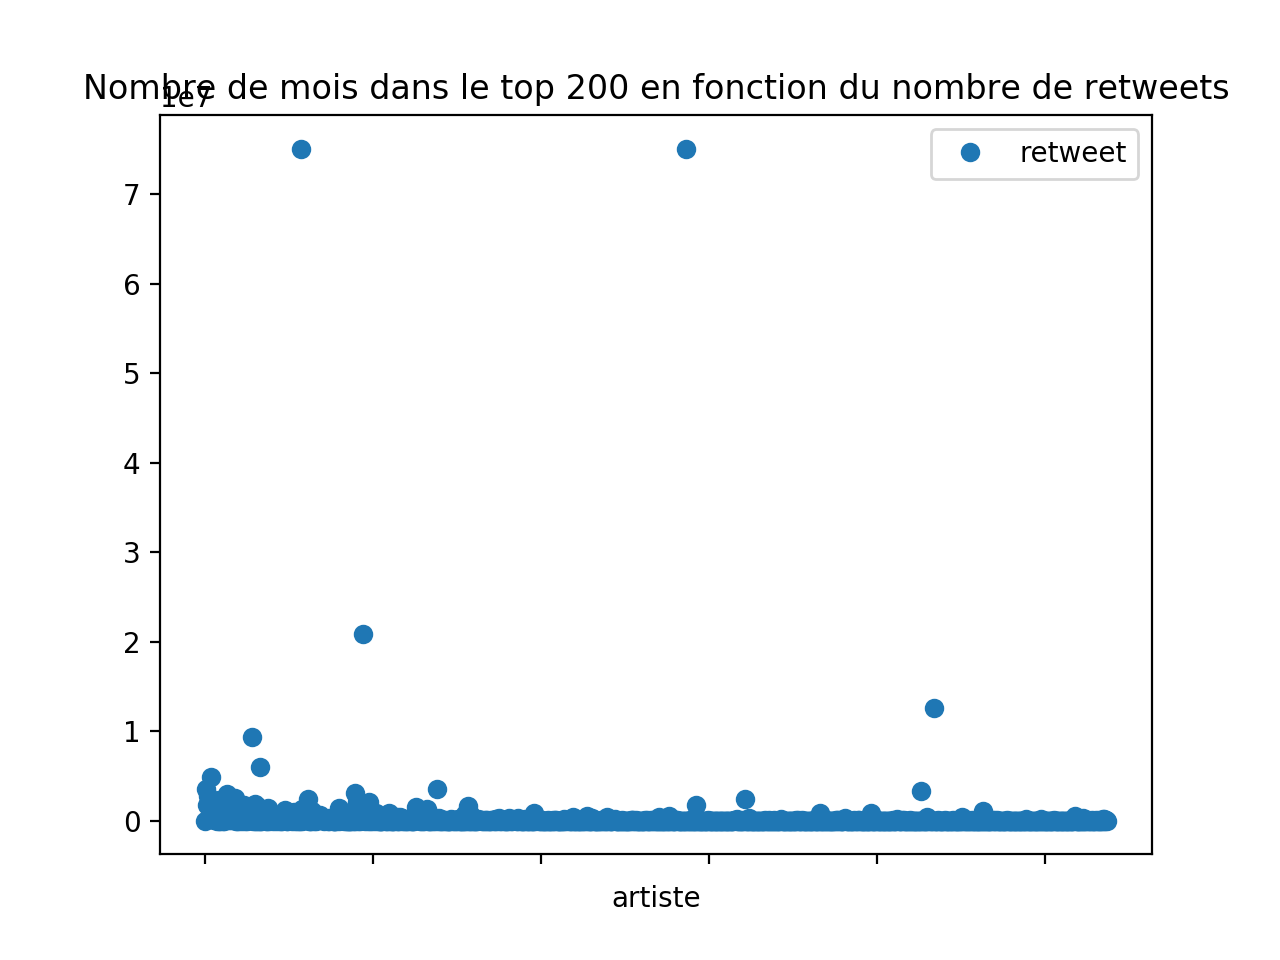

<IPython.core.display.Javascript object>


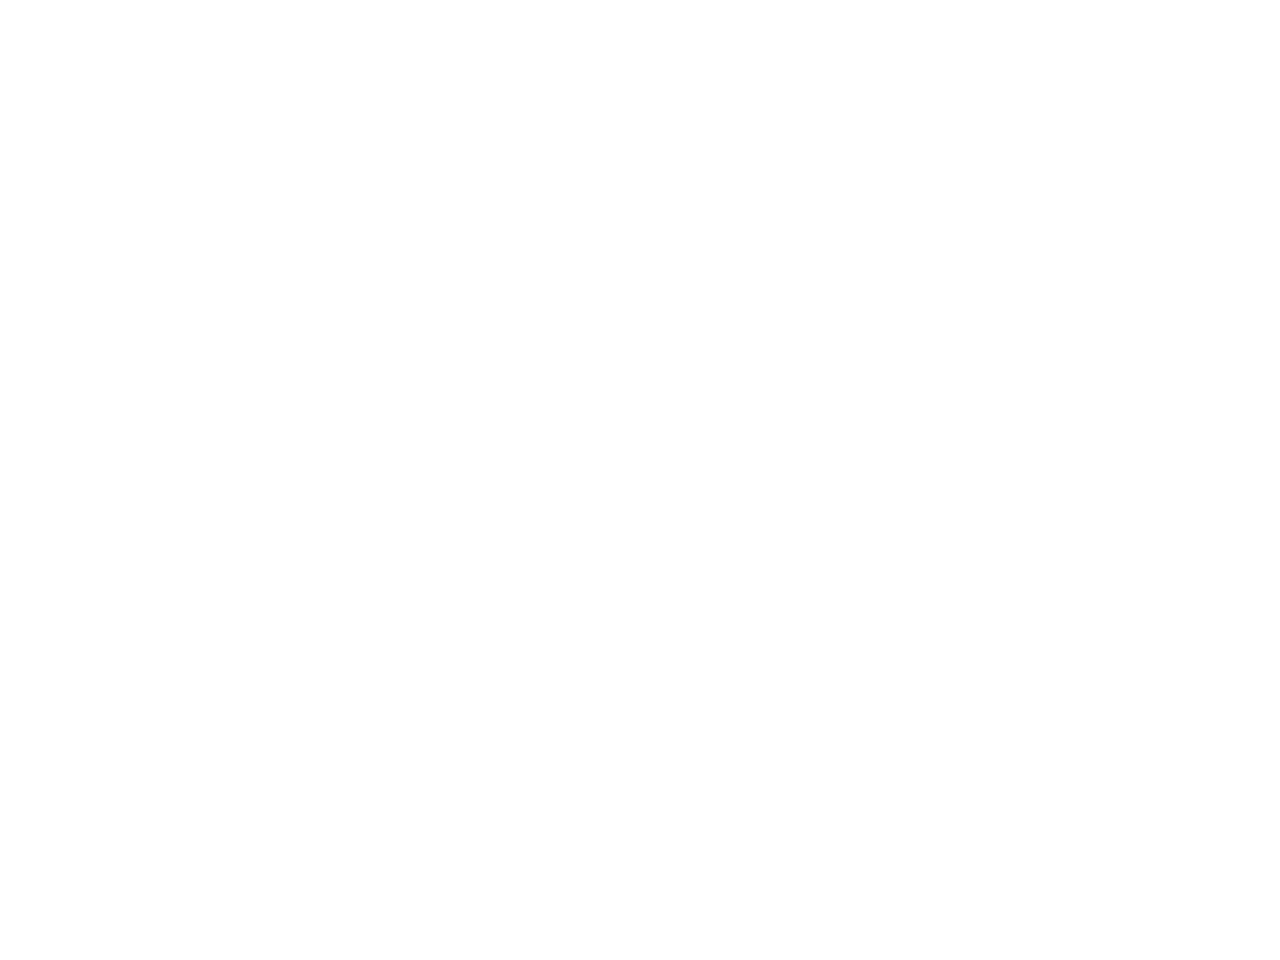

<IPython.core.display.Javascript object>


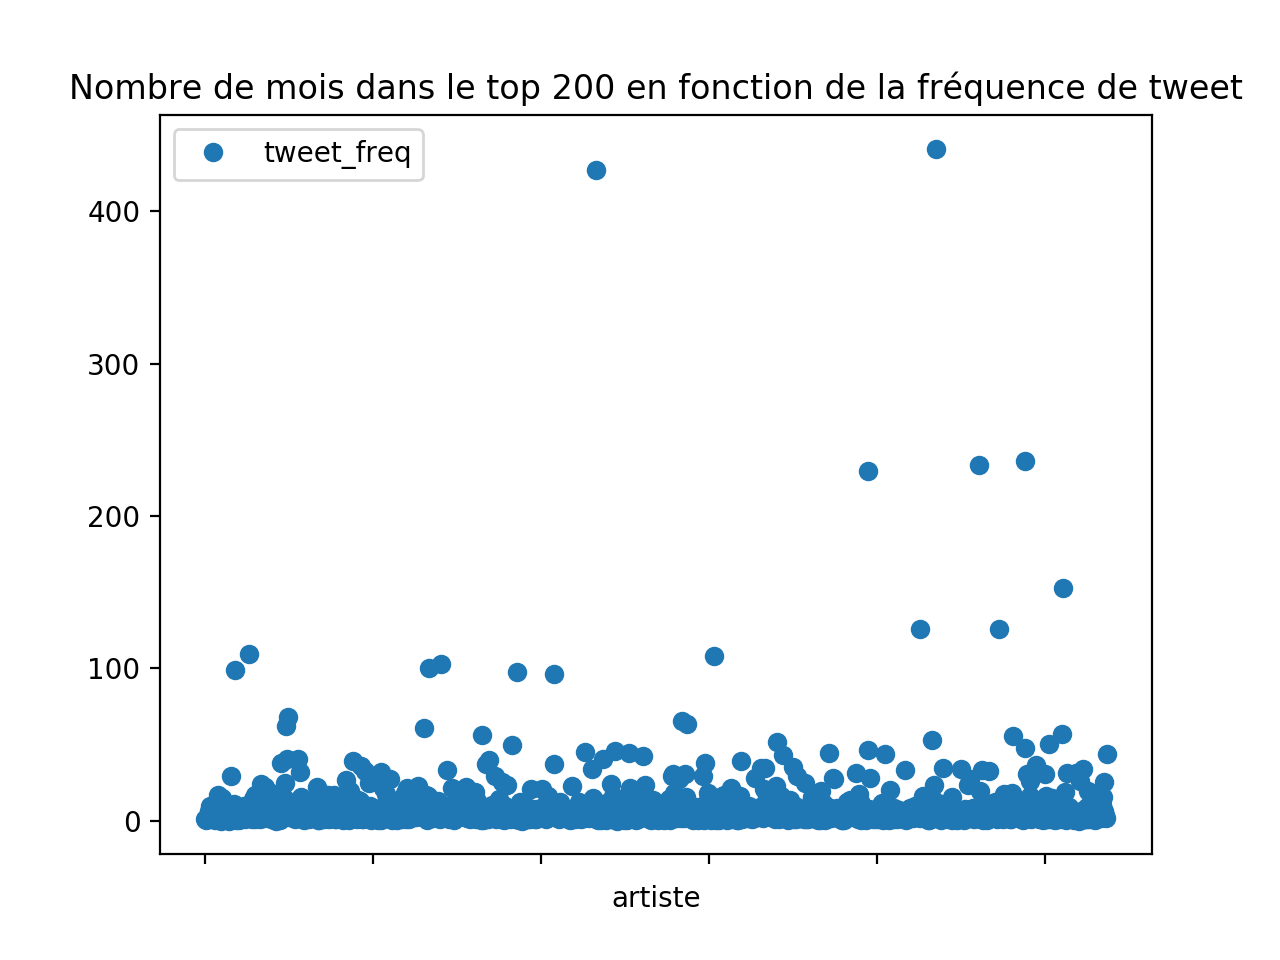

<IPython.core.display.Javascript object>


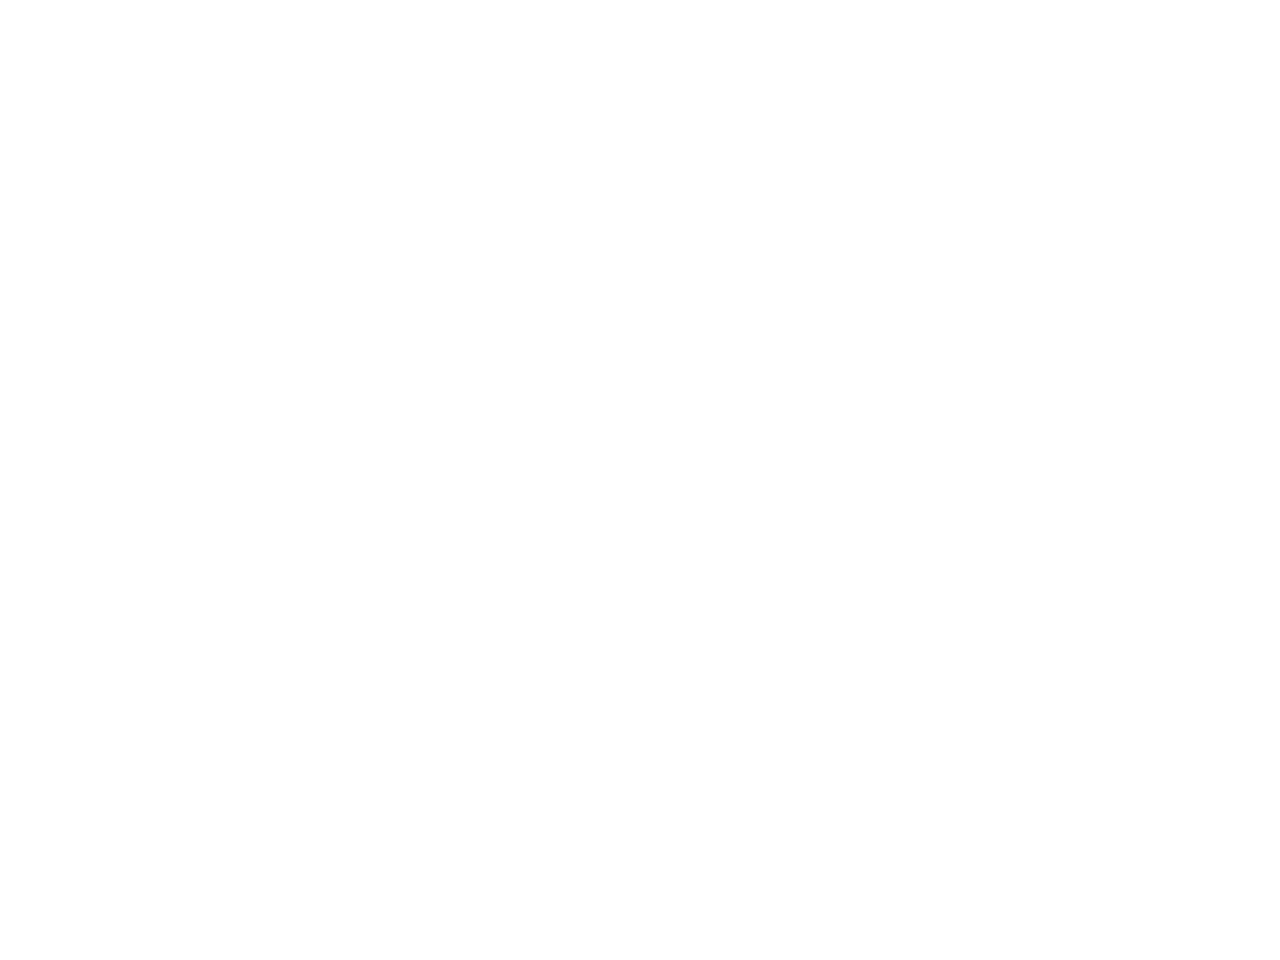

<IPython.core.display.Javascript object>


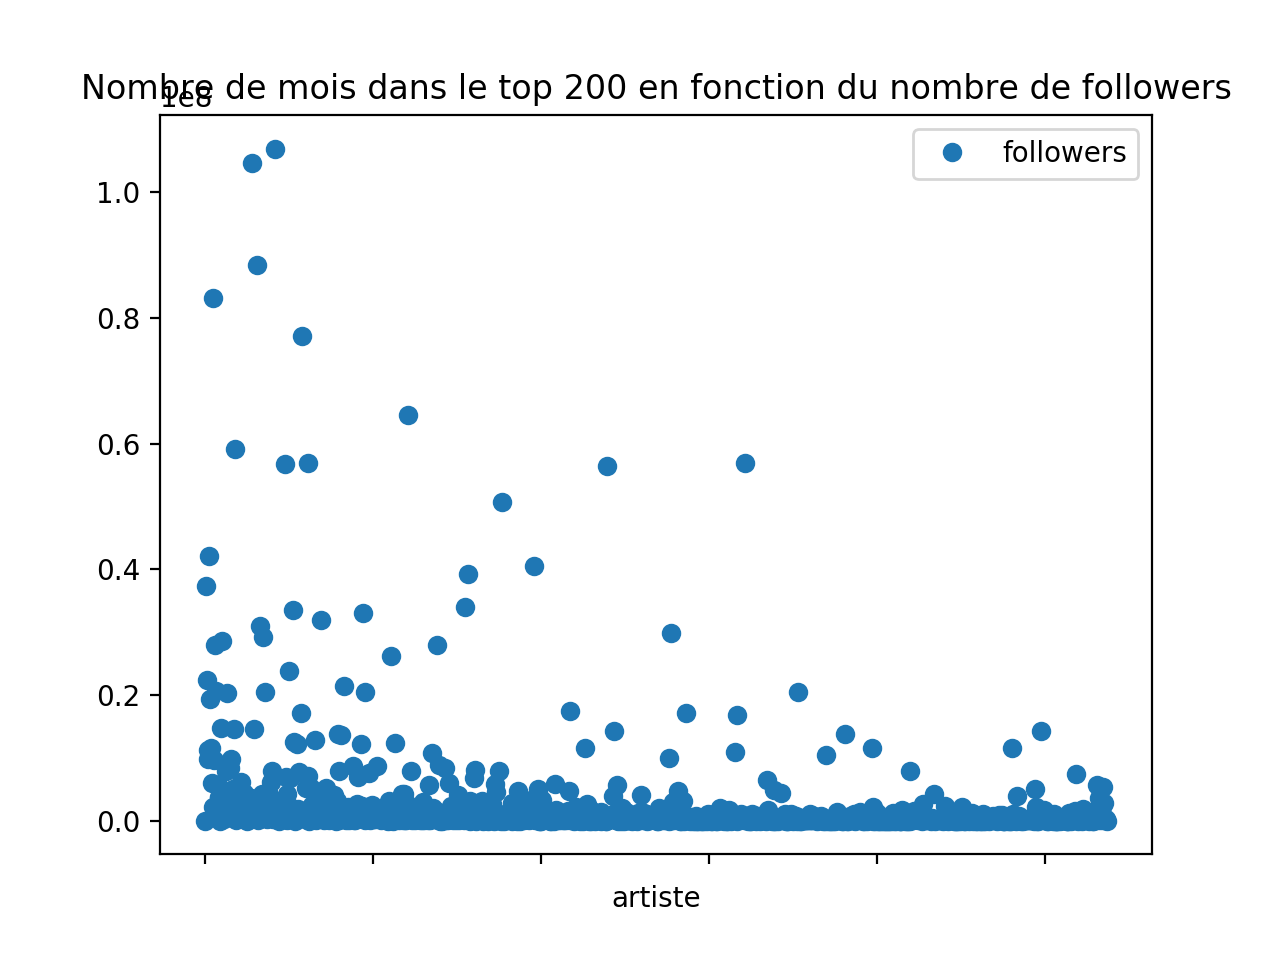

Text(0.5, 1.0, 'Nombre de mois dans le top 200 en fonction du nombre de followers')

In [11]:
import matplotlib.pyplot as plt
df_concat = pd.read_csv('twitter_data.csv')

df_concat2 = df_concat.loc[df_concat['has_tweet'] == True]

plt.figure()
df_concat2.plot(y = 'retweet', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction du nombre de retweets')

plt.figure()
df_concat2.plot(y = 'tweet_freq', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction de la fréquence de tweet')

plt.figure()
df_concat2.plot(y = 'followers', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction du nombre de followers')




![ToucanRecords](img/toucan_records.png)

# Scrapping de Billboard 200

![](img/BILLBOARD.png)

In [12]:
top_artist = pd.read_csv('top_artist_billboard_2010-2019')

In [13]:
top_artist.head(10)

,Artists,nbr_of_month_in_charts
0,Eminem,299
1,Drake,257
2,Taylor Swift,218
3,Michael Jackson,196
4,Zac Brown Band,191
5,Blake Shelton,191
6,Luke Bryan,175
7,Bruno Mars,165
8,Adele,164
9,The Beatles,148


# Scrapping d'Instagram


![](img/instagram.png)

# Scrapping de twitter

![](img/twitter.png)

<IPython.core.display.Javascript object>


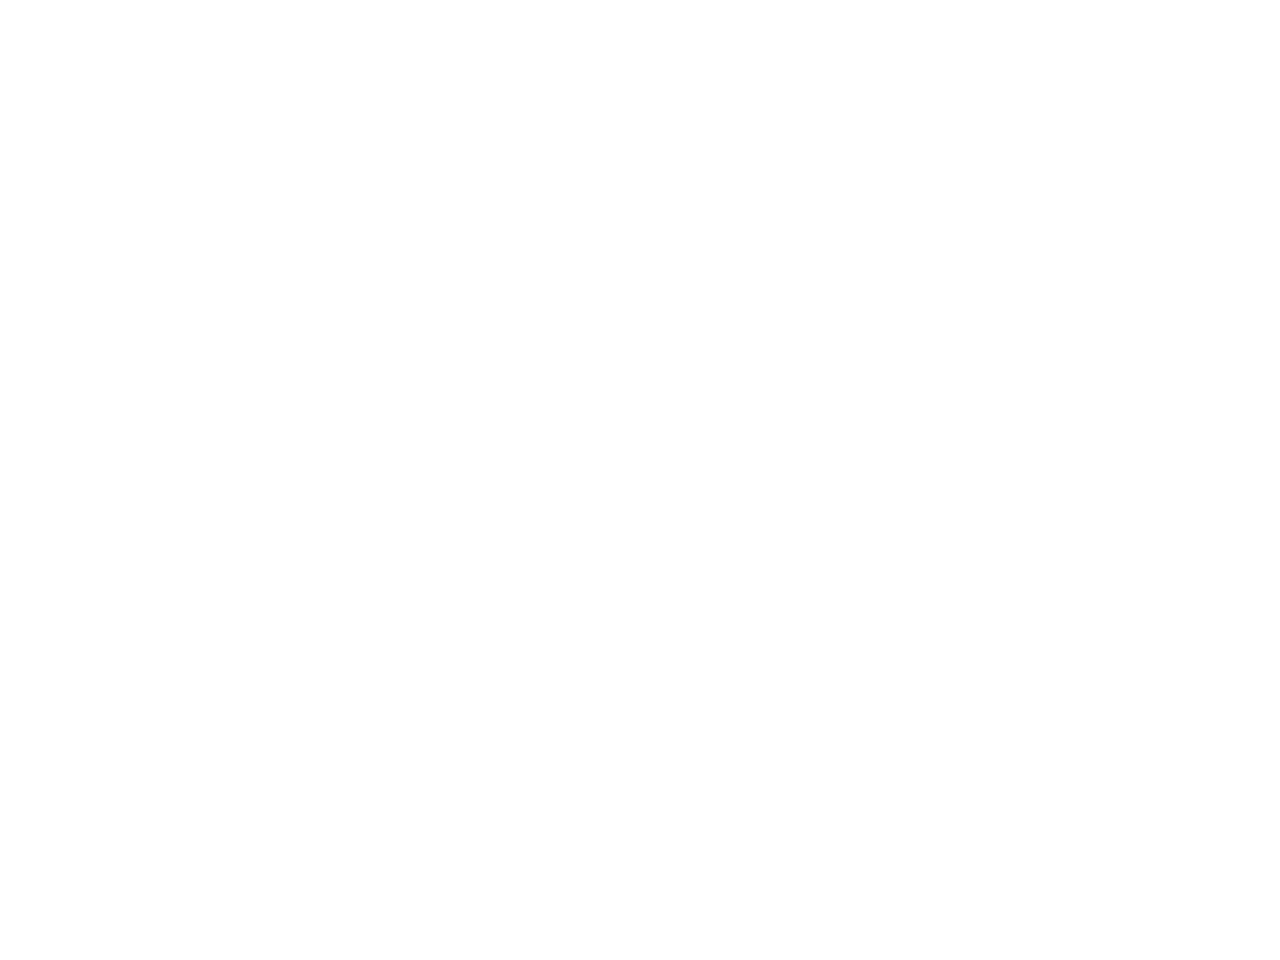

<IPython.core.display.Javascript object>


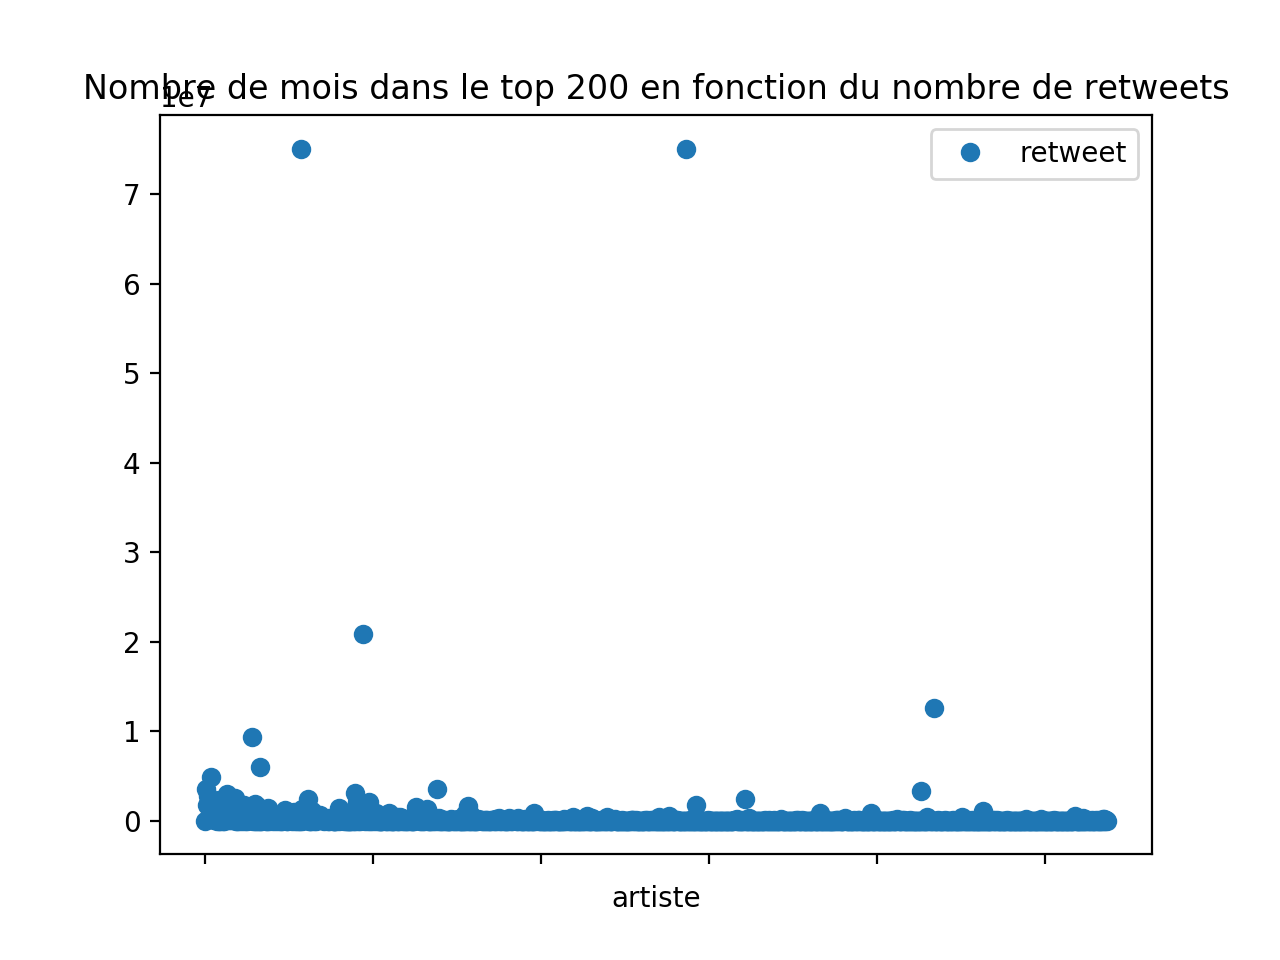

<IPython.core.display.Javascript object>


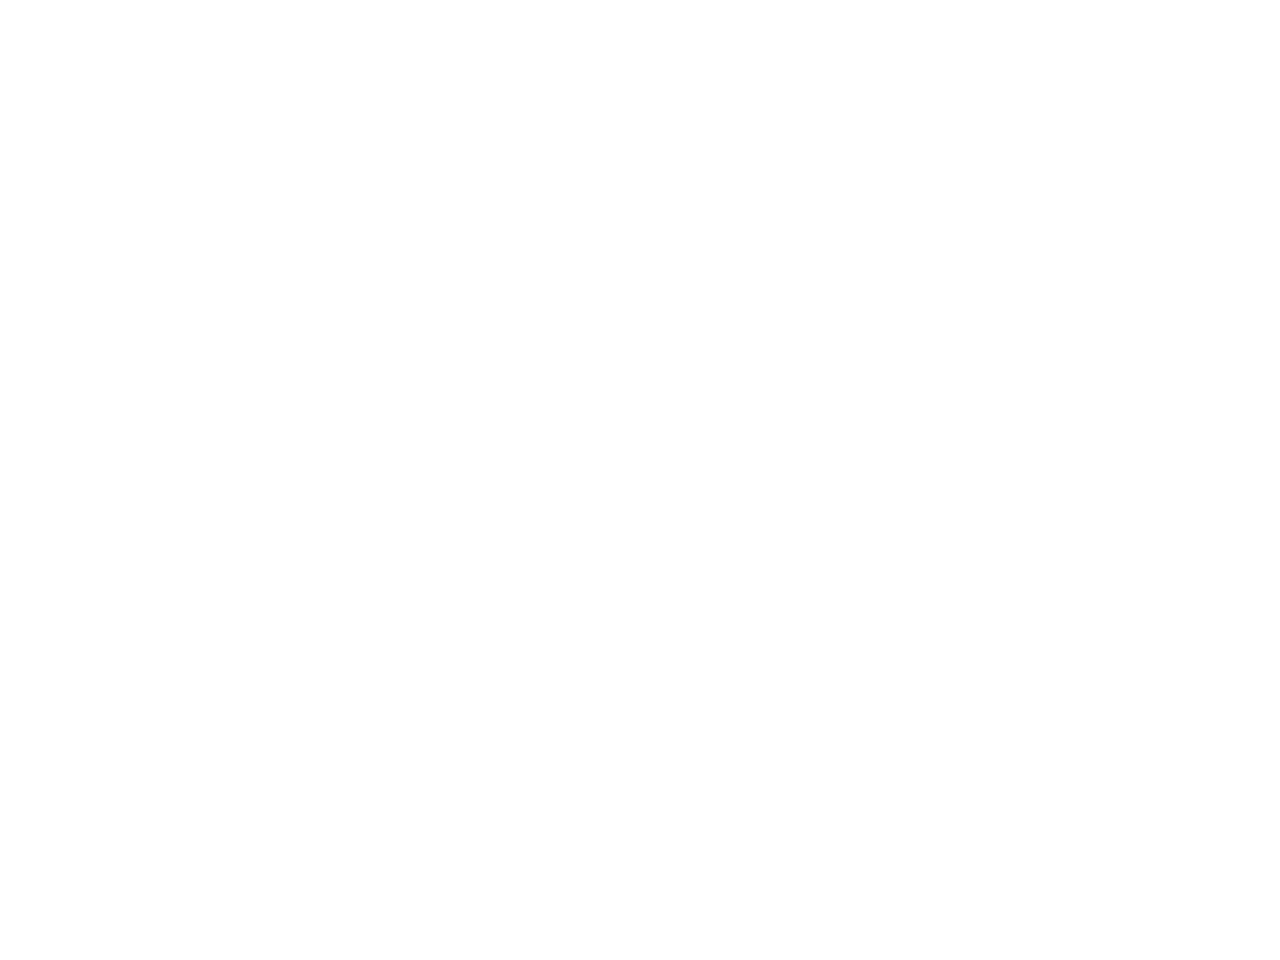

<IPython.core.display.Javascript object>


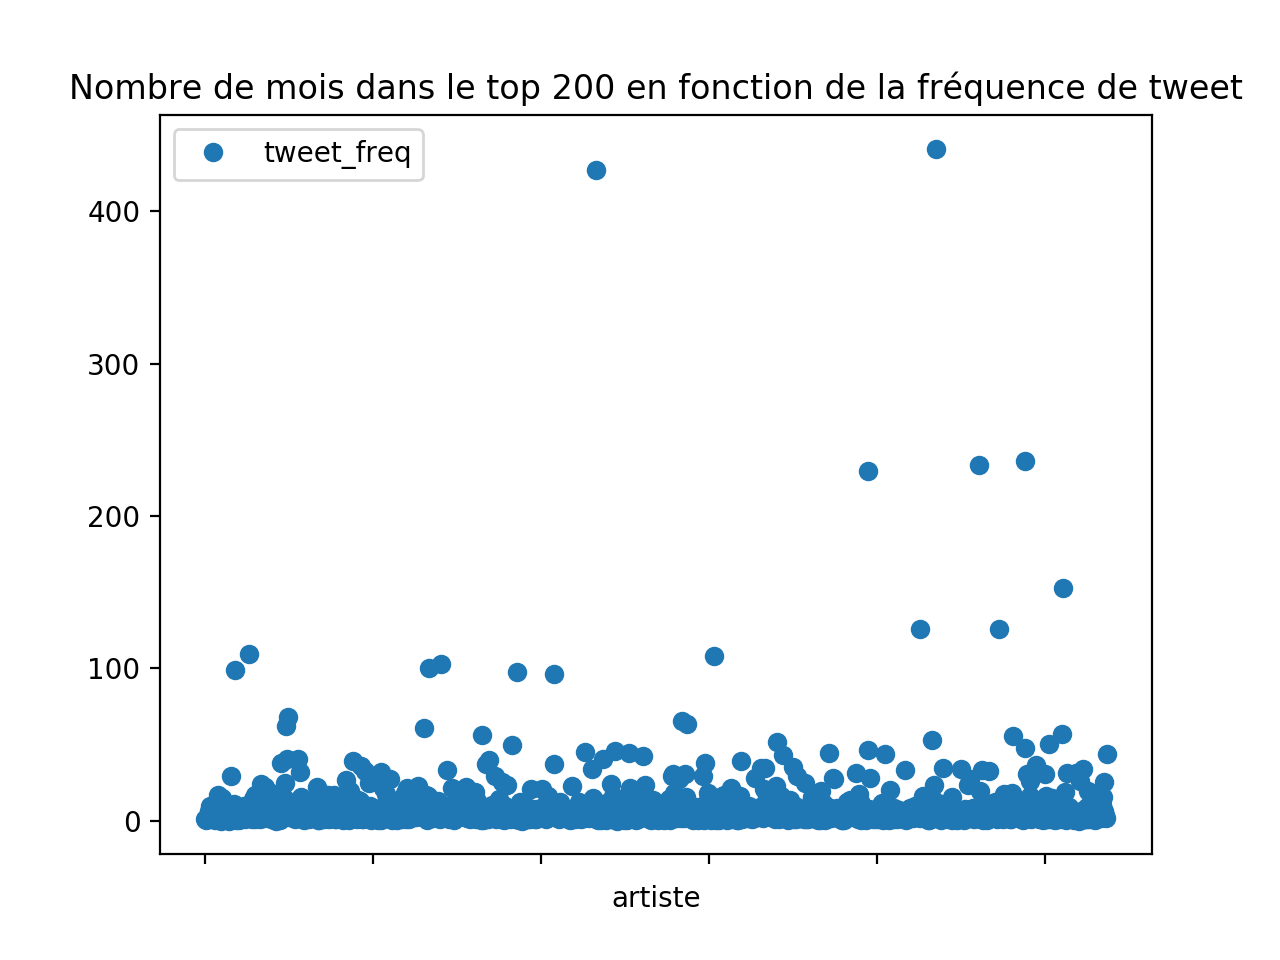

<IPython.core.display.Javascript object>


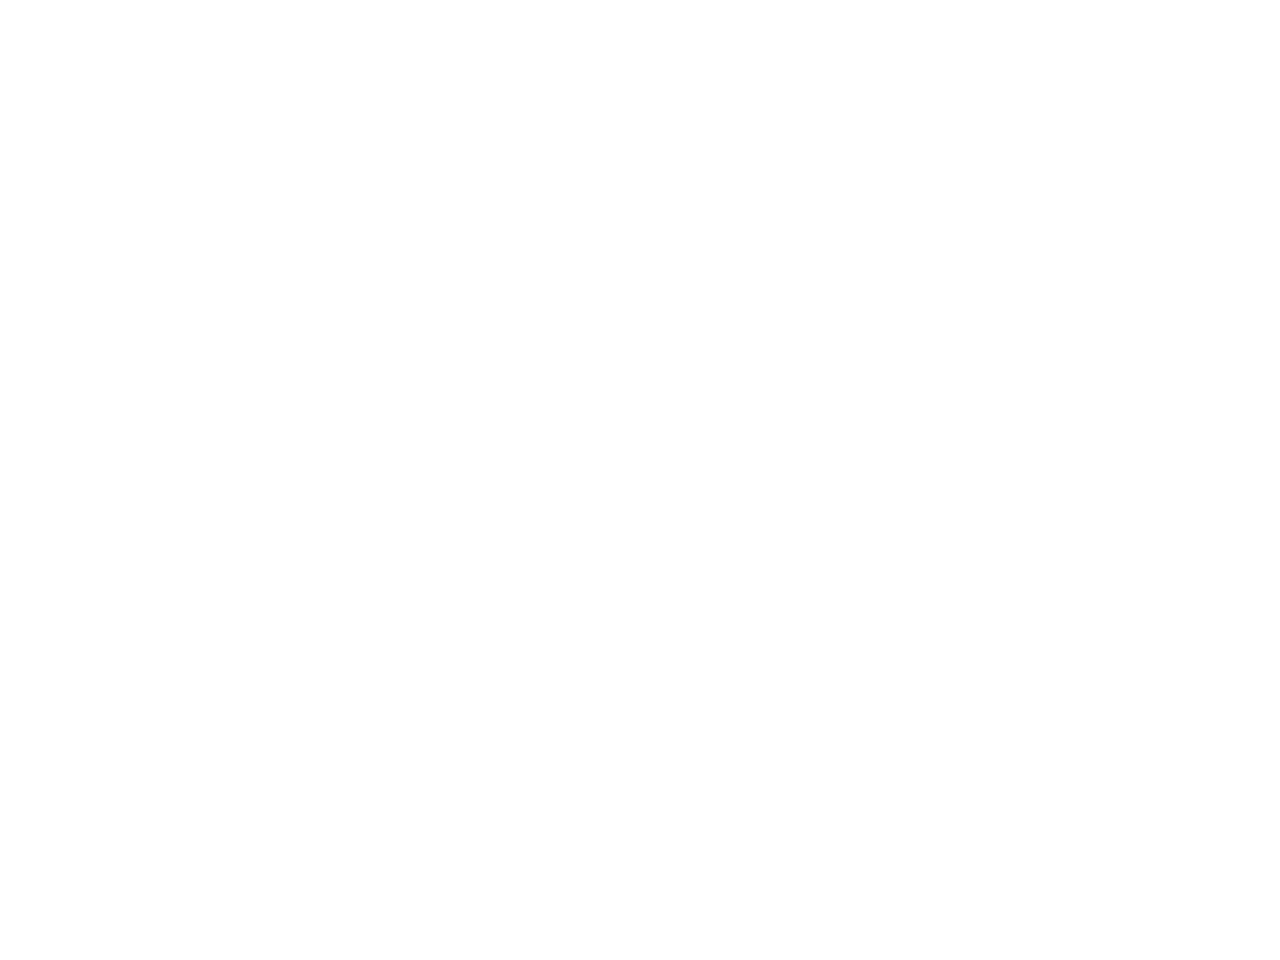

<IPython.core.display.Javascript object>


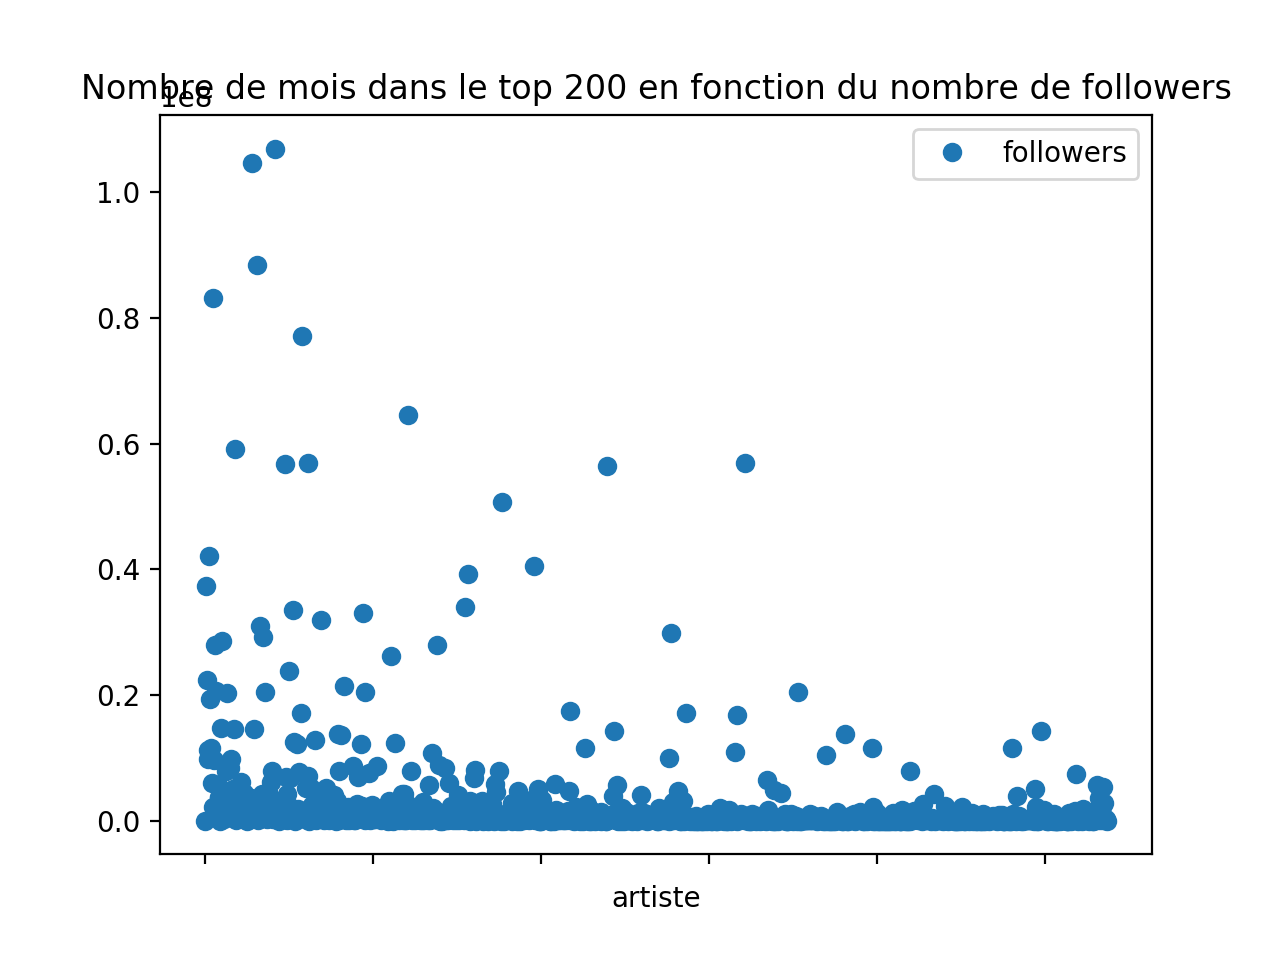

Text(0.5, 1.0, 'Nombre de mois dans le top 200 en fonction du nombre de followers')

In [17]:
import matplotlib.pyplot as plt
df_concat = pd.read_csv('twitter_data.csv')

df_concat2 = df_concat.loc[df_concat['has_tweet'] == True]

plt.figure()
df_concat2.plot(y = 'retweet', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction du nombre de retweets')

plt.figure()
df_concat2.plot(y = 'tweet_freq', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction de la fréquence de tweet')

plt.figure()
df_concat2.plot(y = 'followers', x = 1, style = 'o')
plt.title('Nombre de mois dans le top 200 en fonction du nombre de followers')





# Utilisation de l'API de SPOTIFY

![](img/spotify.png) 

<IPython.core.display.Javascript object>


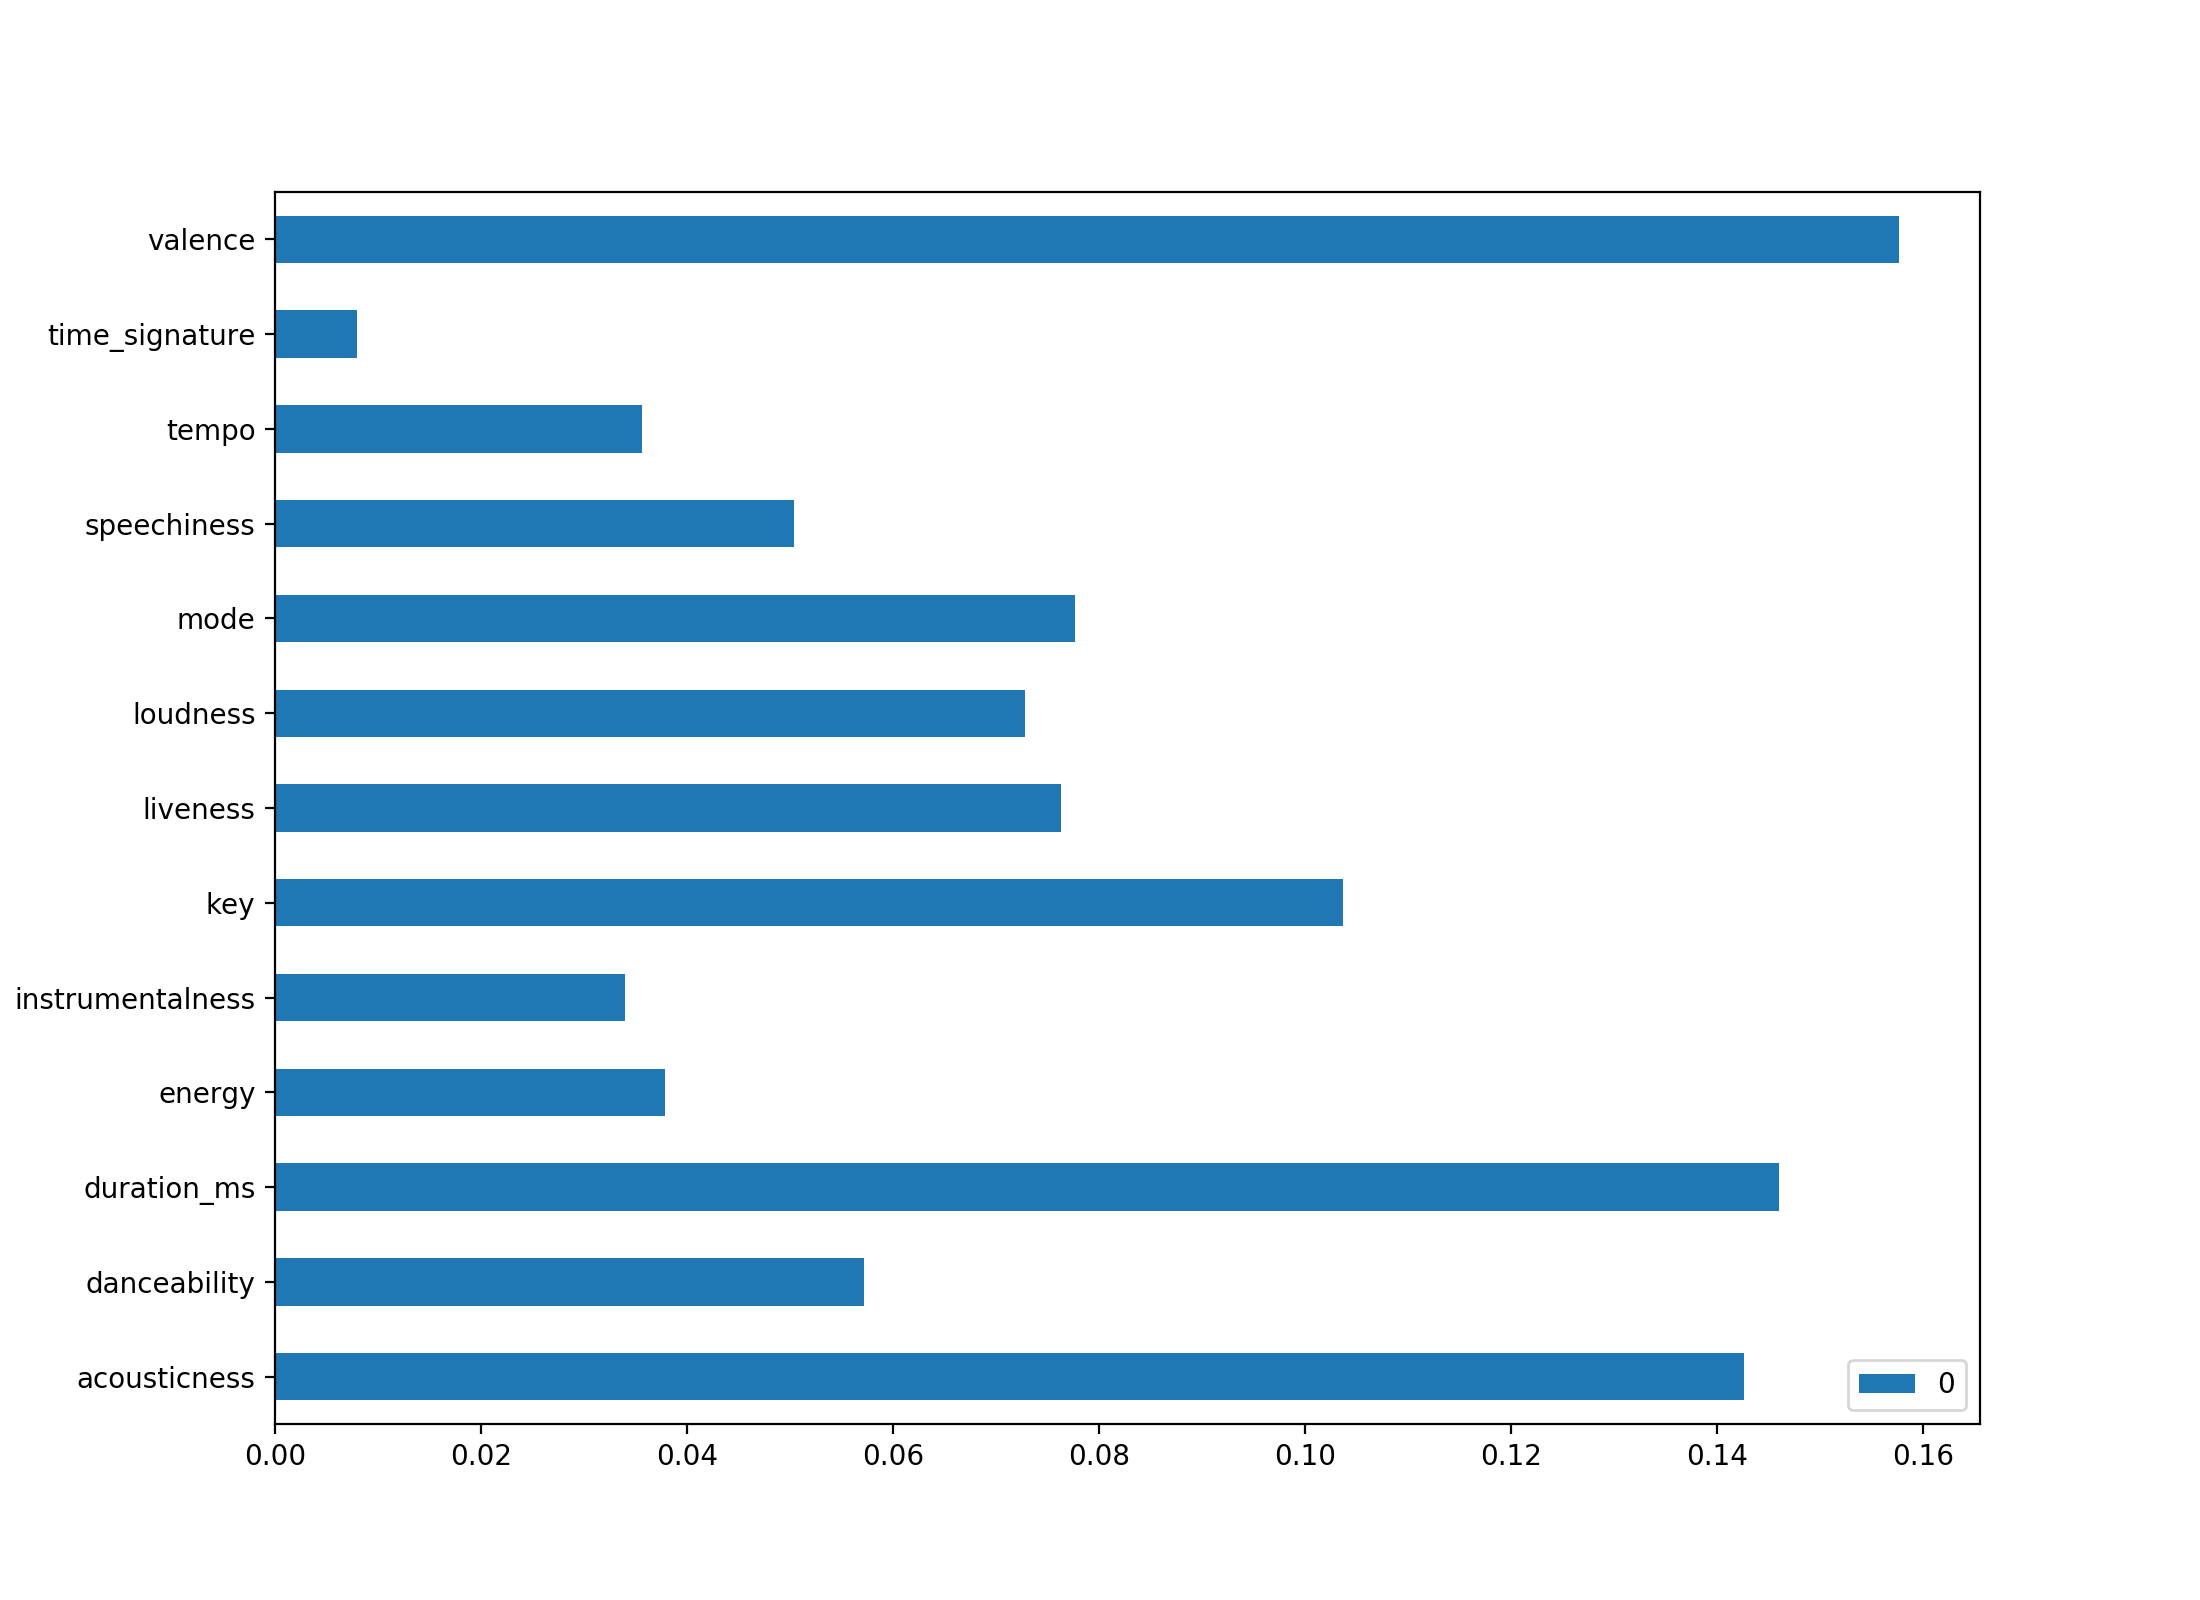

In [16]:
model = ExtraTreeRegressor(criterion='mse', random_state=4, max_features=None, max_depth=1050).fit(X,Y)
df_histo = pd.DataFrame(model.feature_importances_, index=['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
df_histo.plot(kind='barh', figsize=(11,8))

## Les composantes de chansons à imposer à l'artiste :


### Valance 
Positivité de la musique. Est-elle joyeuse, euphorique ou triste, dépressive etc. ?
### Acousticness
Le titre est-il acoustique (proche de 1)? Ou plutôt électronique (proche de 0)?
### Energy
La musique est-elle énergique ? Typiquement, a-t-elle l'air rapide, puissante et bruyante ?
### Key
La clef dans laquelle la musique est jouée, (ex. en clef de Sol, Sol# etc.)